In [82]:
# from langchain.text_splitter import RecursiveCharacterTextSplitter      # earlier
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq

from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled

In [7]:
# 1 Indexing 
            # a. document ingestion
            # b. Text Chunking
            # c. Embedding Generation
            # d. Storage in a Vector Store
# 2 Retrieval 
# 3 Augmentation 
# 4 Generation

## Step 1a - Indexing (Document Ingestion)

In [8]:
# https://www.youtube.com/watch?v=o126p1QN_RI&t=6198s

In [9]:
help(YouTubeTranscriptApi)

Help on class YouTubeTranscriptApi in module youtube_transcript_api._api:

class YouTubeTranscriptApi(builtins.object)
 |  YouTubeTranscriptApi(proxy_config: Optional[youtube_transcript_api.proxies.ProxyConfig] = None, http_client: Optional[requests.sessions.Session] = None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, proxy_config: Optional[youtube_transcript_api.proxies.ProxyConfig] = None, http_client: Optional[requests.sessions.Session] = None)
 |      Note on thread-safety: As this class will initialize a `requests.Session`
 |      object, it is not thread-safe. Make sure to initialize an instance of
 |      `YouTubeTranscriptApi` per thread, if used in a multi-threading scenario!
 |      
 |      :param proxy_config: an optional ProxyConfig object, defining proxies used for
 |          all network requests. This can be used to work around your IP being blocked
 |          by YouTube, as described in the "Working around IP bans" section of the
 |          README
 |      

In [10]:
from youtube_transcript_api import YouTubeTranscriptApi

video_id = "o126p1QN_RI"

try:
    # Create an API instance and fetch the transcript
    ytt_api = YouTubeTranscriptApi()
    fetched_transcript = ytt_api.fetch(video_id, languages=['en'])
    
    # Correctly extract text from the FetchedTranscriptSnippet objects
    transcript = " ".join(chunk.text for chunk in fetched_transcript)
    print(transcript)

except Exception as e:
    print(f"An error occurred: {e}")

Hello all, my name is Krishna and I am super excited to announce this amazing crash course on rag that is retrieval augmented generation. Uh in this specific crash course it'll be somewhere around 2.5 to 3 hours but we are going to discuss everything that is related to rack completely from scratch. Uh we'll be talking about the entire pipeline from data injection to retrieval pipeline to output generation. how to use LLM models, how to use embedding models in this uh along with this uh what should be the right strategy of using chunkings and many more things right so we will be deep diving into both the theoretical understanding along with the practical implementation and we will initially go ahead step by step we'll start with the basic implementation and then as we go ahead in the advanced section we'll also implement the modular coding right the main aim of the modular coding is to link the entire pipeline in a way so that you should be able to understand how rag actually works and 

In [11]:
for chunk in fetched_transcript: 
    print(chunk)

FetchedTranscriptSnippet(text='Hello all, my name is Krishna and I am', start=0.56, duration=4.56)
FetchedTranscriptSnippet(text='super excited to announce this amazing', start=3.04, duration=4.719)
FetchedTranscriptSnippet(text='crash course on rag that is retrieval', start=5.12, duration=5.28)
FetchedTranscriptSnippet(text='augmented generation. Uh in this', start=7.759, duration=4.241)
FetchedTranscriptSnippet(text="specific crash course it'll be somewhere", start=10.4, duration=4.399)
FetchedTranscriptSnippet(text='around 2.5 to 3 hours but we are going', start=12.0, duration=5.359)
FetchedTranscriptSnippet(text='to discuss everything that is related to', start=14.799, duration=5.281)
FetchedTranscriptSnippet(text="rack completely from scratch. Uh we'll", start=17.359, duration=4.801)
FetchedTranscriptSnippet(text='be talking about the entire pipeline', start=20.08, duration=4.24)
FetchedTranscriptSnippet(text='from data injection to retrieval', start=22.16, duration=4.72)
FetchedT

In [12]:
transcript

"Hello all, my name is Krishna and I am super excited to announce this amazing crash course on rag that is retrieval augmented generation. Uh in this specific crash course it'll be somewhere around 2.5 to 3 hours but we are going to discuss everything that is related to rack completely from scratch. Uh we'll be talking about the entire pipeline from data injection to retrieval pipeline to output generation. how to use LLM models, how to use embedding models in this uh along with this uh what should be the right strategy of using chunkings and many more things right so we will be deep diving into both the theoretical understanding along with the practical implementation and we will initially go ahead step by step we'll start with the basic implementation and then as we go ahead in the advanced section we'll also implement the modular coding right the main aim of the modular coding is to link the entire pipeline in a way so that you should be able to understand how rag actually works and

## Step 1b - Indexing (Text Splitting)

In [13]:
splitter=RecursiveCharacterTextSplitter(
    chunk_size=1000, 
    chunk_overlap=200
)

In [14]:
chunks=splitter.split_text(transcript)

In [15]:
chunks[0]

"Hello all, my name is Krishna and I am super excited to announce this amazing crash course on rag that is retrieval augmented generation. Uh in this specific crash course it'll be somewhere around 2.5 to 3 hours but we are going to discuss everything that is related to rack completely from scratch. Uh we'll be talking about the entire pipeline from data injection to retrieval pipeline to output generation. how to use LLM models, how to use embedding models in this uh along with this uh what should be the right strategy of using chunkings and many more things right so we will be deep diving into both the theoretical understanding along with the practical implementation and we will initially go ahead step by step we'll start with the basic implementation and then as we go ahead in the advanced section we'll also implement the modular coding right the main aim of the modular coding is to link the entire pipeline in a way so that you should be able to understand how rag actually works and

In [16]:
type(chunks[0])

str

In [17]:
type(chunks)

list

In [18]:
chunks=splitter.create_documents([transcript])

In [19]:
chunks

[Document(metadata={}, page_content="Hello all, my name is Krishna and I am super excited to announce this amazing crash course on rag that is retrieval augmented generation. Uh in this specific crash course it'll be somewhere around 2.5 to 3 hours but we are going to discuss everything that is related to rack completely from scratch. Uh we'll be talking about the entire pipeline from data injection to retrieval pipeline to output generation. how to use LLM models, how to use embedding models in this uh along with this uh what should be the right strategy of using chunkings and many more things right so we will be deep diving into both the theoretical understanding along with the practical implementation and we will initially go ahead step by step we'll start with the basic implementation and then as we go ahead in the advanced section we'll also implement the modular coding right the main aim of the modular coding is to link the entire pipeline in a way so that you should be able to u

In [20]:
chunks[0]

Document(metadata={}, page_content="Hello all, my name is Krishna and I am super excited to announce this amazing crash course on rag that is retrieval augmented generation. Uh in this specific crash course it'll be somewhere around 2.5 to 3 hours but we are going to discuss everything that is related to rack completely from scratch. Uh we'll be talking about the entire pipeline from data injection to retrieval pipeline to output generation. how to use LLM models, how to use embedding models in this uh along with this uh what should be the right strategy of using chunkings and many more things right so we will be deep diving into both the theoretical understanding along with the practical implementation and we will initially go ahead step by step we'll start with the basic implementation and then as we go ahead in the advanced section we'll also implement the modular coding right the main aim of the modular coding is to link the entire pipeline in a way so that you should be able to un

In [21]:
type(chunks[0])

langchain_core.documents.base.Document

In [22]:
type(chunks)

list

In [23]:
len(chunks)

151

## Step 1c & 1d - Indexing (Embedding Generation and Storing in Vector Store)

In [24]:
embedding_model=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vector_store=FAISS.from_documents(
    documents=chunks,
    embedding=embedding_model
)

In [25]:
vector_store.index_to_docstore_id

{0: '2ccc6dcf-f381-4f57-9b1e-d02da1eaac0e',
 1: '781b1739-dcb3-4fc9-9c7b-32e2afc5055a',
 2: '483f33be-917b-4588-a20d-afb66f330c27',
 3: '7bc217cc-2a53-4b74-b01a-e591f5ba6cca',
 4: '3095ebd0-5864-4e9d-a62c-e1e4b27cf645',
 5: '15fa016f-0bf8-4432-8847-ece9eb166635',
 6: '8a4092e2-4c53-47b6-a27c-e4c6df027620',
 7: '8f860c33-a8dd-4296-8d6d-4901c187fde8',
 8: '27c2cfab-c7a0-405b-91ce-ee801d25bb30',
 9: '382198eb-1a24-4f04-9bb9-cc40b6ff482d',
 10: '8cb914f0-7f78-4892-af61-8fe681e44c5e',
 11: '0ed9c796-ba60-4c40-b1c1-98f26d66d1f3',
 12: 'd6eea151-a444-4222-8547-a7ef9d7dd2e7',
 13: '2eeeb27b-75f1-469e-8c4b-2431a05152c9',
 14: '772c1974-fa60-4e6c-8e4a-24c95bd1a24e',
 15: '9bcf39c1-a9d7-47d2-8b92-3ed5931665b2',
 16: '2af56718-2a08-413e-9ab4-0b94dd25401f',
 17: 'aacbe836-5917-4ae8-ad53-81a2946734d8',
 18: '05dcc5d7-2585-4390-b8c4-7afdd6dc4418',
 19: '405cc7b4-1cdb-4e1f-bba0-81cde535d58d',
 20: 'a4d00505-9070-4463-9aee-45fe3dda2e18',
 21: '7b3c4baf-d844-49d2-ae5a-3c1e1342db92',
 22: 'd7c5d821-5073-

In [26]:
vector_store.get_by_ids(['7e14d804-3f45-4e75-b877-c972a2add318'])

[]

## Step 2 - Retrieval

In [27]:
retriever=vector_store.as_retriever(
    search_type='similarity', 
    search_kwargs={'k': 4}
)

In [28]:
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000187AF79E9B0>, search_kwargs={'k': 4})

In [29]:
type(retriever)

langchain_core.vectorstores.base.VectorStoreRetriever

In [30]:
retriever.invoke('what is rag?')

[Document(id='ac698e41-3a55-4a54-9a5f-44809ff7470e', metadata={}, page_content="this was a complete idea or a kind of crash course that I really wanted to give on the entire uh rag. Rag is one of the most important use cases. That is what I always believe. Most of the companies are specifically building rag applications. So I think this is really really important and super cool topic. I hope you like this particular video. This was it from my side. I'll see you on the next video. Thank you. Take care."),
 Document(id='483f33be-917b-4588-a20d-afb66f330c27', metadata={}, page_content="of all we'll try to understand rag. Okay. So first of all let's go through the definition and then I will give you a brief idea what exactly rag is all about you know. So here you can clearly see that rag is the process of optimizing the output of a large language model. Okay. So it references an authorative knowledge base outside of his training data set source before get generating a response. LLMs are tr

## Step 3 - Augmentation

In [86]:
# llm=ChatGoogleGenerativeAI(model='gemini-2.5-flash', temperature=0.2)
llm=ChatGroq(model='llama-3.1-8b-instant')

In [32]:
prompt=PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided transcript context.
      If the context is insufficient, just say you don't know.

      {context}
      Question: {question}
    """,
    input_variables=['context', 'question']
)

In [33]:
question = "is the topic of retriever discussed in this video? if yes then what was discussed"
retrieved_docs=retriever.invoke(question)

In [34]:
retrieved_docs

[Document(id='faec44e1-f979-44ff-b1af-56d11342043b', metadata={}, page_content="see that it handles query based retrieval from the vector store. So inside the constructor we will be giving two important parameters. One is the vector store and one is the embedding manager. And if you remember we have created both this. We have created the embedding manager. We have created the vector store manager. Right now after giving this we will be initializing two class variables that is vector store and embedding manager and we'll be assigning with this. Now whenever we create a retriever one thing you really need to understand this retriever is actually built on the top of a vector store and retriever is nothing but it is a simple interface based on whatever query we get this retriever is just going to give you the response back. Okay and this retriever is basically a kind of interface which is connected to the vector store and chart. Okay. Now uh the next step that we are going to create is ano

In [35]:
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)

In [36]:
context_text

"see that it handles query based retrieval from the vector store. So inside the constructor we will be giving two important parameters. One is the vector store and one is the embedding manager. And if you remember we have created both this. We have created the embedding manager. We have created the vector store manager. Right now after giving this we will be initializing two class variables that is vector store and embedding manager and we'll be assigning with this. Now whenever we create a retriever one thing you really need to understand this retriever is actually built on the top of a vector store and retriever is nothing but it is a simple interface based on whatever query we get this retriever is just going to give you the response back. Okay and this retriever is basically a kind of interface which is connected to the vector store and chart. Okay. Now uh the next step that we are going to create is another function which will be called as retrieve function. Now this is really\n\n

In [37]:
final_prompt=prompt.invoke({'context':context_text, 'question':question})

In [38]:
final_prompt

StringPromptValue(text="\n      You are a helpful assistant.\n      Answer ONLY from the provided transcript context.\n      If the context is insufficient, just say you don't know.\n\n      see that it handles query based retrieval from the vector store. So inside the constructor we will be giving two important parameters. One is the vector store and one is the embedding manager. And if you remember we have created both this. We have created the embedding manager. We have created the vector store manager. Right now after giving this we will be initializing two class variables that is vector store and embedding manager and we'll be assigning with this. Now whenever we create a retriever one thing you really need to understand this retriever is actually built on the top of a vector store and retriever is nothing but it is a simple interface based on whatever query we get this retriever is just going to give you the response back. Okay and this retriever is basically a kind of interface 

## Step 4 - Generation

In [39]:
answer=llm.invoke(final_prompt)
print(answer.content)

Yes, the topic of retriever is discussed in this video. 

The retriever is described as an interface built on top of a vector store. It is responsible for giving a response based on a query. The retriever is connected to the vector store and chart, and its main purpose is to handle query-based retrieval from the vector store. 

An example of a retriever is the RAG retriever, which is a class that handles query-based retrieval from the vector store. It takes two important parameters in its constructor: the vector store and the embedding manager. 

The retriever is also used to retrieve documents based on a query. In the example provided, the retriever is used to retrieve documents that contain information about a specific topic, such as "embedding model training" and "unified multitask learning framework".


## Building a Chain

In [40]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [41]:
def format_docs(retrieved_docs): 
  context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
  return context_text

In [42]:
parallel_chain=RunnableParallel({
    'context': retriever | RunnableLambda(format_docs), 
    'question': RunnablePassthrough()
})

In [43]:
parallel_chain.invoke('what is rag')

{'context': "this was a complete idea or a kind of crash course that I really wanted to give on the entire uh rag. Rag is one of the most important use cases. That is what I always believe. Most of the companies are specifically building rag applications. So I think this is really really important and super cool topic. I hope you like this particular video. This was it from my side. I'll see you on the next video. Thank you. Take care.\n\nof all we'll try to understand rag. Okay. So first of all let's go through the definition and then I will give you a brief idea what exactly rag is all about you know. So here you can clearly see that rag is the process of optimizing the output of a large language model. Okay. So it references an authorative knowledge base outside of his training data set source before get generating a response. LLMs are trained on vast volume of data as we all know and use billions of parameters to generally original output for task like question answering, translati

In [44]:
parser=StrOutputParser()

In [45]:
main_chain=parallel_chain | prompt | llm | parser

In [46]:
result=main_chain.invoke('can you summarize the video in 200 words')
print(result)

The speaker is discussing rack pipelines and their applications, specifically in the context of a tool called Rag. Rag is a kind of application that connects various retrievers, tools, and web search to summarize output using Large Language Models (LLMs). The speaker has created three different rack pipelines, each with varying levels of complexity, and is demonstrating how they work.

The speaker mentions that they are planning to start a startup soon and the application they are developing is a Rag application that solves a problem for developers. They are also involved in developing a product for India and are unable to upload many videos due to their busy schedule.

The speaker then demonstrates an advanced Rag function, providing context and queries to retrieve information. The output is displayed in a specific format, including the source information, page number, score, and preview information. The final output is truncated at 300 characters.


In [47]:
retrieved_docs

[Document(id='faec44e1-f979-44ff-b1af-56d11342043b', metadata={}, page_content="see that it handles query based retrieval from the vector store. So inside the constructor we will be giving two important parameters. One is the vector store and one is the embedding manager. And if you remember we have created both this. We have created the embedding manager. We have created the vector store manager. Right now after giving this we will be initializing two class variables that is vector store and embedding manager and we'll be assigning with this. Now whenever we create a retriever one thing you really need to understand this retriever is actually built on the top of a vector store and retriever is nothing but it is a simple interface based on whatever query we get this retriever is just going to give you the response back. Okay and this retriever is basically a kind of interface which is connected to the vector store and chart. Okay. Now uh the next step that we are going to create is ano

In [48]:
# 💡 In short:

# k=4 → retrieves top 4 relevant chunks.

# It does not summarize the whole video, only those parts.
# For a complete summary, you need:
        # chunk-wise summarization, or
        # map-reduce chain, or
        # increase k.

# we will learn this later

## Evaluation of RAG App

In [49]:
questions=[
    'what is rag?', 
    'how to evaluate a rag application',
    'how retrievers work?'
]

In [50]:
ground_truths=[
    "RAG (Retrieval-Augmented Generation) is an approach where a language model retrieves relevant documents from an external knowledge source and uses them as context to generate accurate and up-to-date answers.", 
    "A RAG application is evaluated by measuring the quality of retrieved documents and the generated answer using metrics such as context precision, context recall, faithfulness, and answer relevancy. These metrics help identify issues like missing information, irrelevant retrieval, and hallucination.", 
    "Retrieval works by converting documents and user queries into vector embeddings and searching for the most similar vectors in a vector database. The most relevant documents are then returned and passed to the language model as context for answer generation."
]

In [51]:
## inference: 

answers = []
contexts = []

for question in questions:
    # 1. Retrieve ONCE
    retrieved_docs = retriever.invoke(question)
    context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)

    
    final_prompt=prompt.invoke({'context':context_text, 'question':question})
    
    # 2. Generate answer using SAME context
    response = llm.invoke(final_prompt)

    # 3. Store for RAGAS
    answers.append(response.content)
    contexts.append([doc.page_content for doc in retrieved_docs])


In [52]:
answers

['Rag is the process of optimizing the output of a large language model by referencing an authoritative knowledge base outside of its training data set source before generating a response.',
 "You don't know.",
 "A retriever is actually built on top of a vector store and it's a simple interface based on whatever query we get this retriever is just going to give you the response back. It's a kind of interface which is connected to the vector store and chart."]

In [53]:
contexts

[["this was a complete idea or a kind of crash course that I really wanted to give on the entire uh rag. Rag is one of the most important use cases. That is what I always believe. Most of the companies are specifically building rag applications. So I think this is really really important and super cool topic. I hope you like this particular video. This was it from my side. I'll see you on the next video. Thank you. Take care.",
  "of all we'll try to understand rag. Okay. So first of all let's go through the definition and then I will give you a brief idea what exactly rag is all about you know. So here you can clearly see that rag is the process of optimizing the output of a large language model. Okay. So it references an authorative knowledge base outside of his training data set source before get generating a response. LLMs are trained on vast volume of data as we all know and use billions of parameters to generally original output for task like question answering, translating and c

In [54]:
# to dict: 

data = {
    "user_input": questions,     
    "reference": ground_truths,   
    "answer": answers,            
    "contexts": contexts          
}

In [55]:
data

{'user_input': ['what is rag?',
  'how to evaluate a rag application',
  'how retrievers work?'],
 'reference': ['RAG (Retrieval-Augmented Generation) is an approach where a language model retrieves relevant documents from an external knowledge source and uses them as context to generate accurate and up-to-date answers.',
  'A RAG application is evaluated by measuring the quality of retrieved documents and the generated answer using metrics such as context precision, context recall, faithfulness, and answer relevancy. These metrics help identify issues like missing information, irrelevant retrieval, and hallucination.',
  'Retrieval works by converting documents and user queries into vector embeddings and searching for the most similar vectors in a vector database. The most relevant documents are then returned and passed to the language model as context for answer generation.'],
 'answer': ['Rag is the process of optimizing the output of a large language model by referencing an authori

In [56]:
from datasets import Dataset

dataset=Dataset.from_dict(data)

In [57]:
dataset

Dataset({
    features: ['user_input', 'reference', 'answer', 'contexts'],
    num_rows: 3
})

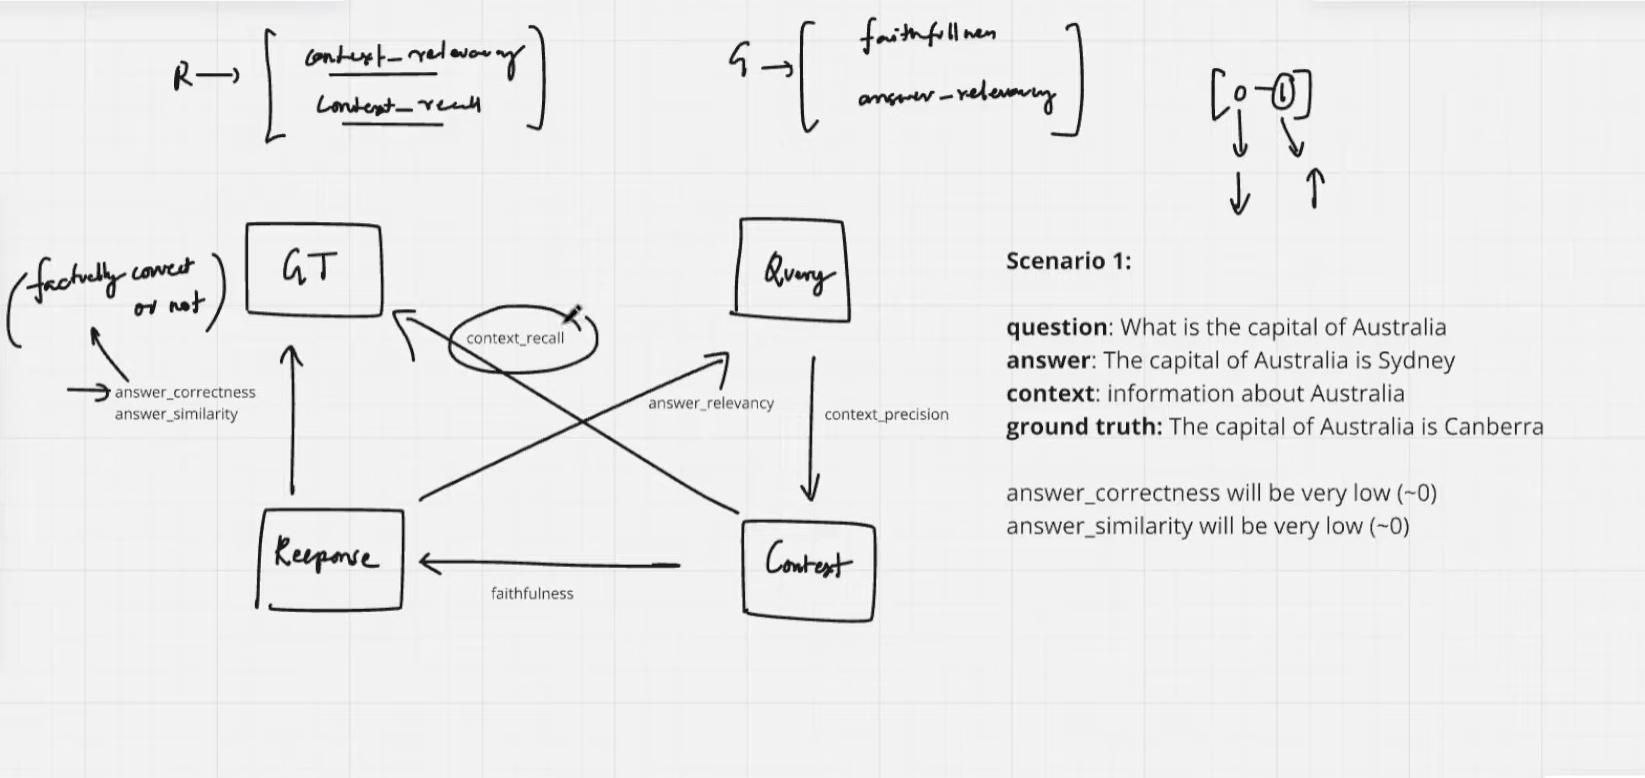

In [103]:
from IPython.display import Image, display

display(Image(filename="metric.png"))


In [ ]:

# faithfulness, # (context -> Response)
# answer_relevancy, # (Response -> Query)
# context_recall,  # (context-> ground truths)
# context_precision #(Query -> context)
# answer_correctness # (answer->ground truths)
# answer_similarity # (answer-> ground truths)



C:\Users\91830\AppData\Local\Temp\ipykernel_16216\280495664.py:2: DeprecationWarning: Importing faithfulness from 'ragas.metrics' is deprecated and will be removed in v1.0. Please use 'ragas.metrics.collections' instead. Example: from ragas.metrics.collections import faithfulness
  from ragas.metrics import faithfulness, answer_relevancy, context_recall, context_precision, answer_correctness, answer_similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_16216\280495664.py:2: DeprecationWarning: Importing answer_relevancy from 'ragas.metrics' is deprecated and will be removed in v1.0. Please use 'ragas.metrics.collections' instead. Example: from ragas.metrics.collections import answer_relevancy
  from ragas.metrics import faithfulness, answer_relevancy, context_recall, context_precision, answer_correctness, answer_similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_16216\280495664.py:2: DeprecationWarning: Importing context_recall from 'ragas.metrics' is deprecated and will be remove

In [ ]:
# user_input ─┐
#             ├── context_precision (embedding) -> “Among the documents we retrieved, how many are actually useful for the question?”
# contexts  ──┘


# Example:

# Question: What is RAG?

# Retrieved chunks: 4

# Relevant chunks: 3

# 👉 context_precision = 3 / 4 = 0.75

# 📌 High score = less junk documents
# 📌 Low score = retriever is bringing useless data

# 🧠 Uses embeddings, not LLM.

#-----------------------------------------------------------------------------------------------------------------------------------------------------------

# reference(gt)─┐
#            ___├── context_recall (embedding) -> “Did the retrieved documents contain all the important information from the correct answer?”
# contexts ─┘

# Example:

# Ground truth has 5 key points

# Retrieved contexts cover only 3

# 👉 context_recall = 3 / 5 = 0.6

# 📌 High score = retriever found enough info
# 📌 Low score = important info is missing

# 🧠 Uses embeddings, not LLM.
#-----------------------------------------------------------------------------------------------------------------------------------------------------------
# contexts ─┐
#            ├── faithfulness (LLM)  -> Is the answer strictly based on the retrieved documents?”
# answer   ─┘                                 


# Example:

# Context says: RAG uses retrieval + generation

# Answer says: RAG was invented by Google in 2024 ❌

# 👉 Low faithfulness (hallucination)

# 📌 High score = answer is grounded in context
# 📌 Low score = model made things up

# 🧠 Uses LLM judgment.

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
# user_input ─┐
#              ├── answer_relevancy (LLM) -> “Does the answer really answer what was asked?”
# answer     ─┘


# Example:

# Question: How do retrievers work?

# Answer: Retrievers convert text into vectors and search similar ones ✅

# 👉 High answer_relevancy

# 📌 High score = clear, on-topic answer
# 📌 Low score = vague or off-topic answer

# 🧠 Uses LLM judgment.

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
# reference(gt) ─┐
#             ├── answer_similarity (embedding)
# answer    ─┘

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
# reference(gt) ─┐
#              ├── answer_correctness (LLM) 
# answer ───┘



In [99]:
# if we use paid chatgpt api then we can do this in one go


from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision, 
    answer_correctness, 
    answer_similarity
)

result = evaluate(
    dataset=dataset,
    metrics=[
        context_precision,  
        context_recall,
        faithfulness,
        answer_relevancy, 
        answer_correctness, 
        answer_similarity
    ],
    llm=llm,
    embeddings=embedding_model
)

print(result)


C:\Users\91830\AppData\Local\Temp\ipykernel_16216\1208968281.py:5: DeprecationWarning: Importing faithfulness from 'ragas.metrics' is deprecated and will be removed in v1.0. Please use 'ragas.metrics.collections' instead. Example: from ragas.metrics.collections import faithfulness
  from ragas.metrics import (
C:\Users\91830\AppData\Local\Temp\ipykernel_16216\1208968281.py:5: DeprecationWarning: Importing answer_relevancy from 'ragas.metrics' is deprecated and will be removed in v1.0. Please use 'ragas.metrics.collections' instead. Example: from ragas.metrics.collections import answer_relevancy
  from ragas.metrics import (
C:\Users\91830\AppData\Local\Temp\ipykernel_16216\1208968281.py:5: DeprecationWarning: Importing context_recall from 'ragas.metrics' is deprecated and will be removed in v1.0. Please use 'ragas.metrics.collections' instead. Example: from ragas.metrics.collections import context_recall
  from ragas.metrics import (
C:\Users\91830\AppData\Local\Temp\ipykernel_16216\12

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

LLM returned 1 generations instead of requested 3. Proceeding with 1 generations.
LLM returned 1 generations instead of requested 3. Proceeding with 1 generations.
Exception raised in Job[15]: BadRequestError(Error code: 400 - {'error': {'message': "'n' : number must be at most 1", 'type': 'invalid_request_error'}})
Exception raised in Job[13]: TimeoutError()
Exception raised in Job[2]: TimeoutError()
Exception raised in Job[8]: TimeoutError()
Exception raised in Job[4]: TimeoutError()
Exception raised in Job[14]: TimeoutError()
Exception raised in Job[7]: TimeoutError()
Exception raised in Job[10]: TimeoutError()
Exception raised in Job[12]: TimeoutError()
Exception raised in Job[16]: TimeoutError()


{'context_precision': 0.6667, 'context_recall': 1.0000, 'faithfulness': nan, 'answer_relevancy': 0.0107, 'answer_correctness': nan, 'answer_similarity': 0.4460}


In [100]:
result

{'context_precision': 0.6667, 'context_recall': 1.0000, 'faithfulness': nan, 'answer_relevancy': 0.0107, 'answer_correctness': nan, 'answer_similarity': 0.4460}

In [101]:
df=result.to_pandas()

In [102]:
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,answer_correctness,answer_similarity
0,what is rag?,[this was a complete idea or a kind of crash c...,Rag is the process of optimizing the output of...,RAG (Retrieval-Augmented Generation) is an app...,1.000000,1.0,NaN,0.021402,NaN,0.812051
1,how to evaluate a rag application,[this was a complete idea or a kind of crash c...,You don't know.,A RAG application is evaluated by measuring th...,0.333333,NaN,NaN,0.000000,NaN,0.095220
2,how retrievers work?,[see that it handles query based retrieval fro...,A retriever is actually built on top of a vect...,Retrieval works by converting documents and us...,NaN,NaN,NaN,NaN,NaN,0.430589


In [ ]:
# in a paid chatgpt api it will work completely

## if there is no ground truths

In [104]:
# In short:

# If a RAG app has no ground truths, evaluate behavior, not correctness.

# Use these three metrics:

# Context Precision → Are retrieved documents relevant?

# Faithfulness → Is the answer grounded in retrieved context (no hallucination)?

# Answer Relevancy → Does the answer actually address the question?

# 👉 These do NOT need ground truth and are used in real production RAG systems.

# One-liner (interview-ready):

# “Without ground truths, RAG systems are evaluated using retrieval quality and answer grounding metrics instead of correctness.”

## how to collect ground truths: 

In [ ]:
# Ground truths are correct answers written on purpose, they are not automatic.

# They are created by:

# Humans or experts writing the correct answer

# Trusted documents (PDFs, policies, books) where the answer is already written

# Strong LLMs generating answers that humans review and approve

# In practice, ground truths are made for some important or sample questions, not for every user query, and then used to check answer correctness.